<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B5%EC%9E%A5%5D_%EA%B0%80%EC%B9%98%EC%A3%BC%EB%A5%BC_%EC%B0%BE%EB%8A%94_%EA%B8%B0%EC%88%A0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 재무 데이터 산출 기준
: 1년에 한 번 연간 실적을 발표하는 사업보고서(Annual report)와 분기별로 3개월치 실적을 발표하는 분기보고서(Quarterly report)

* *연간 데이터* : 사업보고서에서 추출한 데이터로 만든 것
  * 데이터 가공이 용이해 편함 BUT 1년에 한 번만 매매를 하게 되어 대응이 늦어짐 (단점)
  * 미국은 결산 시기가 제각각(한국은 대부분 12월에 결산) → 미국 주식에 투자할 때는 연간 데이터의 효용이 떨어짐
* *분기 데이터* : 분기보고서에서 나온 것
  * 3개월마다 발표 → 가장 빈번하게 나오는 투자 정보
  * 바로 투자에 이용하기엔 무리가 있음
  * 계절효과를 감안하지 않고 이용하면 데이터를 이해함에 있어 착오가 생길 수 있음
* *트레일링(Trailing) 데이터*
  * 연간 데이터와 분기 데이터의 **한계**를 극복
  *  *4개 분기만큼의 이동합계*를 구해서 만들기 → 매 분기를 기준으로 1년간의 분기 데이터를 합쳐 연간 데이터를 만들어낸 것
  * 비교 대상이 동일해질 뿐 아니라, 계절효과도 제거할 수 있음

# 2. 가치주란?

* 좋은 주식 X, 싼 주식 X → 기업의 *실제 가치에 비해 낮은 가격에 거래*되는 주식, 기업의 실제 가치를 구해야 함
* **밸류에이션(Valuation)** : 가치평가에 대한 내용
  * *상대가치법*
    * **대상 종목을 유사한 다른 종목의 주가와 비교**하여 산출하는 방법
    * PER, PBR, PSR, PCR 등이 유명하며 특성에 따라 EV/EBITDA, EV(Enterprise Value)/Sales 등도 사용
  * *절대가치법*
    * 다른 종목과 상관없이 **대상 종목 자체의 수치만 놓고** 구함
    * **RIM(Residual Income Model)** : 재무제표만으로 간단히 할 수 있는 방식


## [주가, 자본, 이익 관계 내의 가치주 지표 산출]
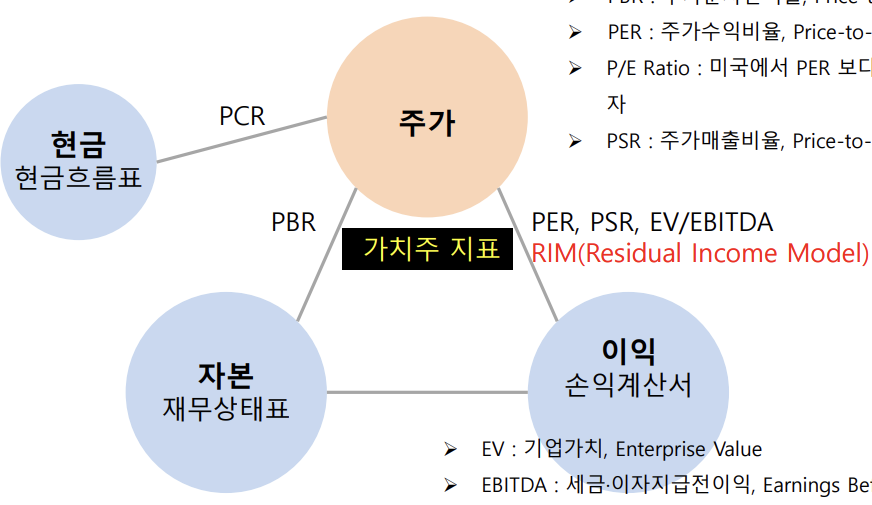


 * *PCR* : 주가*현금흐름*비율, Price-to-Cash Flow Ratio
 * *PBR*: 주가*순자산*비율, Price-to-Book Ratio
 * *PER*: 주가*수익*비율, Price-to-Earning Ratio
 * *P/E Ratio* : 미국에서 PER보다 많이 사용하는 약자
 * *PSR* : 주가*매출*비율, Price-to-Sales Ratio
 * *ER* : 기업가치, Enterprise Value
 * *EBITDA* : 세금, 이자지급전이익, Earnings Before Interest, Taxes, Depreciation(감가상각) and Amortization(부채상환)


## 1) 이익 대비 저평가 종목, PER(Price to Earning Ratio: 주가수익비율)
* **이익에 대해 시장이 매기는 가치**
* 기업가치 = 기업을 사는데 필요한 돈 -> 시가총액(주가x주식수)
* **주식투자 비용을 회수하는데 걸리는 시간**

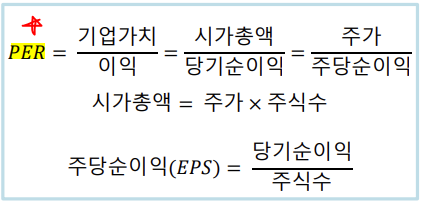

### [PER(주가수익비율) 지표 산출]

#### 1) 코스트코(Cost)의 재무제표 불러오기

## `fn_single(otp, symbol, window)`


* otp : OTP 코드 값
* symbol : 종목코드
* window : 데이터 산출 기준
  * 재무제표 데이터를 읽을 때에는 산출 기준이 매우 중요함
  * 분기 데이터 가져오기 → **window='Q'**
  * 분기 데이터를 *합쳐서 1년 치로 만든 트레일링 데이터* 가져오기 →  **window='T'**

In [1]:
pip install finterstellar

     |████████████████████████████████| 109 kB 15.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs
otp = '16499185281189711897'

In [3]:
df = fs.fn_single(otp, symbol='COST', window='T')
df.tail(3)

,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,Shares,...,Long Term Liabilities,Total Liabilities,Shareholders Equity,Depreciation,Operating Cash Flow,Capital Expenditure,Investing cash flow,Dividends,Financing cash flow,Price
2021-08-31,1.979980e+11,1.726410e+11,2.535700e+10,1.827300e+10,5.278000e+09,5.061000e+09,11.42,8.852000e+09,5.278000e+09,443089000.0,...,1.174900e+10,4.119000e+10,1.807800e+10,2.002000e+09,9.644000e+09,-2.695000e+09,-4.196000e+09,-5.438000e+09,-6.207000e+09,455.49
2021-11-30,2.035920e+11,1.775150e+11,2.607700e+10,1.864000e+10,5.631000e+09,5.434000e+09,12.26,9.221000e+09,5.631000e+09,443377000.0,...,1.180700e+10,4.514900e+10,1.900000e+10,2.029000e+09,1.286400e+10,-3.177000e+09,-4.753000e+09,-1.358000e+09,-2.396000e+09,539.38
2022-02-28,2.102190e+11,1.836170e+11,2.660200e+10,1.908300e+10,7.443000e+09,5.513000e+09,12.44,9.272000e+09,7.443000e+09,443623000.0,...,1.155700e+10,4.310200e+10,1.997600e+10,2.071000e+09,9.932000e+09,-3.900000e+09,-3.891000e+09,-1.358000e+09,-2.805000e+09,519.25


In [4]:
df.columns # 가져온 데이터 확인 -> PER 계산에 필요한 Price(주가)와 EPS(주당순이익) 값을 이용

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

#### 2) PER를 계산하고 코스트코의 PER 추이를 차트로 그려보기
: *PER = Price / EPS* 공식대로 계산

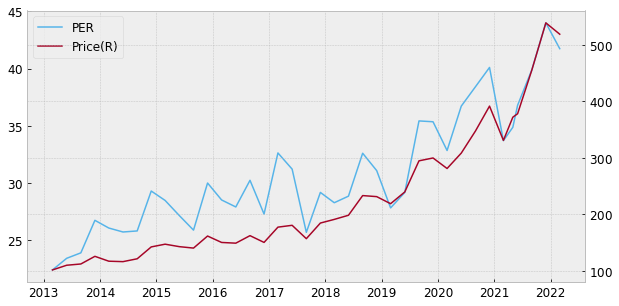

In [5]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

-> 주가흐름의 추이와 PER의 추이가 왠지 비슷해 보임

#### 3) 밴드차트 그리기
* PER과 같이 *재무지표와 가격이 결합*된 지표 -> 주가배수(Price Multiple), 프라이스멀티플, 멀티플이라고 부름
* **주가 = PER x EPS(주당순이익)**로 그리는 것으로 *멀티플 변동을 한눈에 파악*할 수 있음

## `draw_price_multiple_band(df, multiple, acct)`


* multiple : 프라이스멀티플 이름
* acct : 계산에 필요한 컬럼

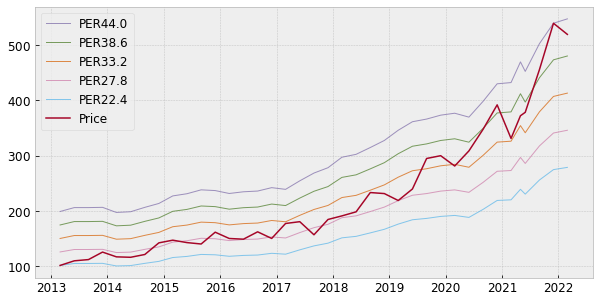

In [6]:
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

-> 보라색 선은 PER이 40일때 주가, 맨 아래 하늘색 선은 PER이 22일 때의 주가를 나타냄, 빨간색은 주가

 * PER이 과거에 비해 지금 어느 정도 수준에 있는지, 과거엔 어땠는지 한눈에 보임 -> *저평가 종목*을 골라내는데 유용한 도구 (지난 10년 대비 현재는 PER이 꽤 높은 수준)
 * *PER이 낮을수록 이익 대비 저평가*된 종목 -> **가치주**

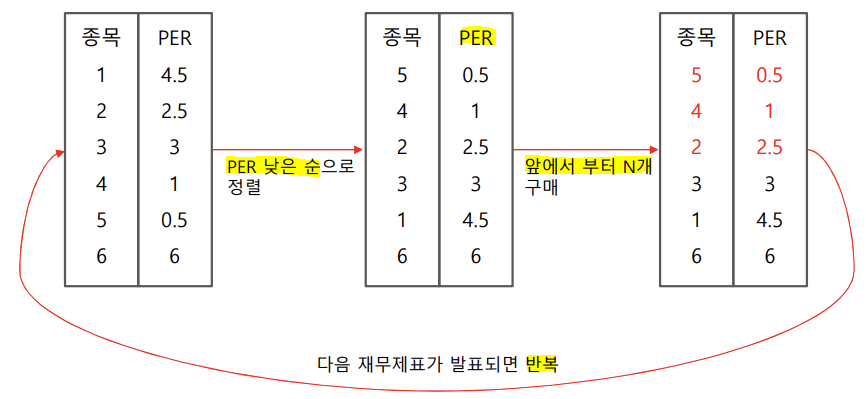

#### 4) 전체 상장 종목의 재무정보 데이터 불러오기

## `fn_consolidated(otp, term, vol)`
: *여러 기업의 재무 정보를 모아 분기별로 한 번에 조회*할 수 있음

* term : 조회 대상 기간인 분기 값
* vol : 일평균 거래량 (예: 10만주 이상)
* 반환되는 값 -> 해당 분기 재무제표 **주요 계정의 트레일링 데이터**

In [7]:
df = fs.fn_consolidated(otp=otp, term='2020Q3', vol=100000, study='Y')
df.head(3) # symbol : 종목이름

2020Q3... For Study. Freezed at the end of July 2021. OK


,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Financing Cash Flow,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020Q3,5223.000,2437.0,2786.000,1494.000,797.000,691.000,2.26,1105.000,797.000,...,49.00,100.94,102.09,116.90,118.49,Agilent Technologies Inc,애질런트 테크놀로지스,Healthcare,Diagnostics & Research,1362200
AA,2020Q3,9330.000,8043.0,1287.000,213.000,-23.000,-469.000,-2.53,643.000,-23.000,...,484.00,11.63,12.92,19.90,23.05,Alcoa Corp,알코아,Basic Materials,Aluminum,5513100
AAIC,2020Q3,64.772,0.0,64.772,12.559,11.162,-54.799,-1.52,62.763,52.213,...,-3220.76,2.84,2.46,3.21,3.78,Arlington Asset Investment Corp Class A,알링턴 에셋 인베스트먼트 Class A,Real Estate,Reit Mortgage,166900


In [8]:
df.columns # 제공하는 컬럼명은 재무제표 계정과목으로 되어있음

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

### [가져온 재무제표 데이터 정보(손익계산서)]

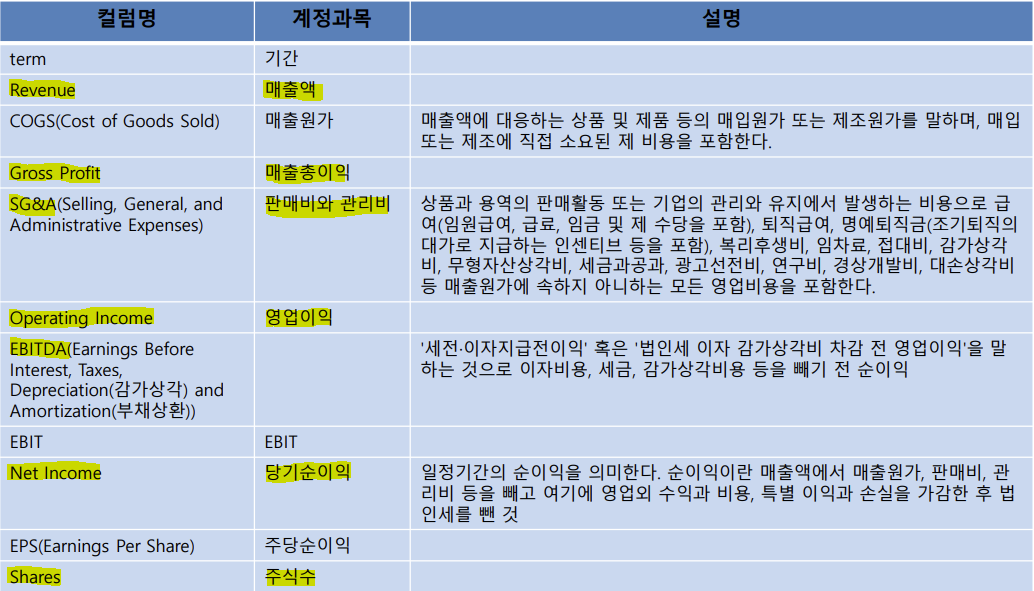

### [가져온 재무제표 데이터 정보(재무상태표)]

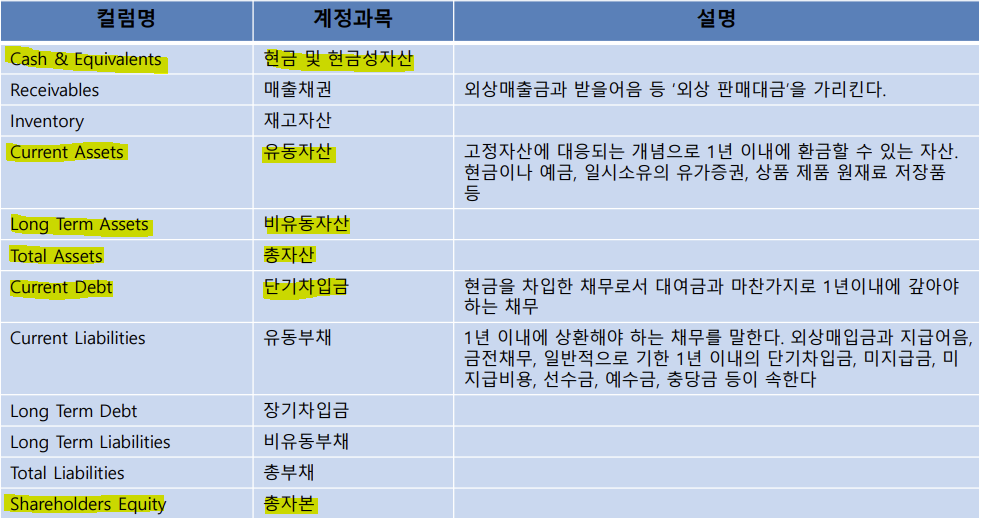

### [가져온 재무제표 데이터 정보(현금흐름표, 종목정보)]
* 대부분 PER 값은 분기말 주가를 기준으로 함
* 하지만 실제 투자를 해당 분기 말에 할 수는 없기 때문에 Price_M1~Price_M3를 제공해 사용자가 필요한 시점의 주가를 골라 사용할 수 있음

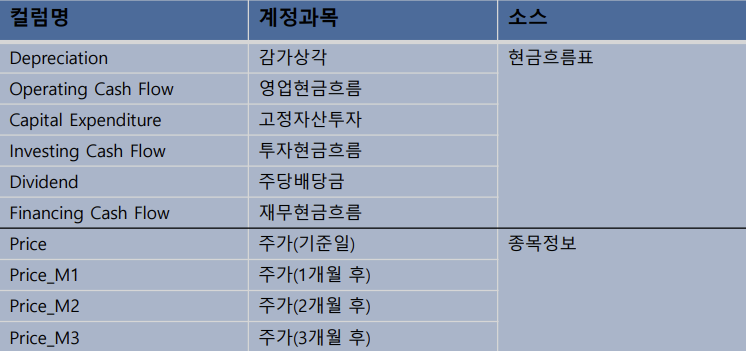

In [9]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

symbol
A       44.663717
AA      -4.596838
AAIC    -1.868421
AAL     -0.887365
AAOI    -2.877238
          ...    
ZUMZ    11.401639
ZUO    -14.985507
ZVO     -7.547170
ZYME   -10.017204
ZYXI    56.290323
Name: PER, Length: 3021, dtype: float64

분기 말 주가를 기준으로 PER 계산
* PER = 주가 / EPS
* 결과를 보면 *PER가 마이너스인 종목이 많이 보임*
  * 적자 기업은 EPS가 마이너스이기 때문에 그럼
  * 많은 사이트가 *마이너스인 경우 0으로 처리*
* 값이 NAN인 기업은 EPS를 보고하지 않아 계산하지 못한 것

#### 5) 백테스트
: 분기별로 ***PER 값이 낮은 순서대로 상위 30개 종목***에 투자하는 전략을 테스트

* 투자기간 : 2010년 1분기에 최초 투자 ~ 2021년 1분기까지 완료하는 것을 가정
* 데이터 : 2009년 4분기 ~ 2020년 4분기까지 데이터 (2020년 1분기에 최초 투자를 개시해서 2021년 1분기까지 완료하는 것을 가졍해 1년으로 함)
* **set_terms() 함수**를 이용하여 거래시작시점(trade_start)과 종료 시점(trade_end)을 보내면 그 거래 기간에 이용될 재무 데이터 산출 기준 기간을 출력함

In [10]:
terms = fs.set_terms(trade_start='2010Q1', trade_end='2021Q1')
terms

Index(['2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
       '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
       '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

-> 2020년 1분기에 거래하려면 2019년 4분기 데이터를 기준으로 거래 판단을 해야 하기 때문에 재무 데이터 기간은 거래 기간보다 한 분기 빠름

In [11]:
data = {}
for t in terms :
  data[t] = fs.fn_consolidated(otp=otp, term=t)

2009Q4...OK
2010Q1...OK
2010Q2...OK
2010Q3...OK
2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [12]:
print(data['2020Q3']) # 2020년 3분기 데이터

          term    Revenue        COGS  Gross Profit       SG&A  \
symbol                                                           
A       2020Q3   5223.000   2437.0000     2786.0000  1494.0000   
AA      2020Q3   9330.000   8043.0000     1287.0000   213.0000   
AADI    2020Q3     15.231      0.0536       15.1931     6.5211   
AAIC    2020Q3     64.772      0.0000       64.7720    12.5590   
AAL     2020Q3  24623.000  24753.0000     -130.0000  1348.0000   
...        ...        ...         ...           ...        ...   
ZUO     2020Q3    291.102    133.8200      157.2820   164.3350   
ZVO     2020Q3    400.263     52.4540      347.8090    90.3900   
ZWS     2020Q3   1981.400   1211.8000      769.6000   419.8000   
ZYME    2020Q3     25.148    176.5170     -151.3690    72.3060   
ZYXI    2020Q3     68.679     14.5790       54.1000    42.4170   

        Operating Income  Net Income      EPS     EBITDA       EBIT  ...  \
symbol                                                           

* 모든 분기 재무제표에서 반복문을 사용해 PER 값을 계산
* 계산한 PER는 각 분기 'PER' 컬럼을 생성해 저장

In [13]:
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

* 각 분기별로 트레이딩 할 종목을 선정하여 시그널을 저장할 딕셔너리 s에 담기
* 대상 종목을 사용하는 것은 *fn_filter() 함수* 사용
* PER를 기준으로 PER가 1부터 10사이인 종목 중 낮은 순서대로 상위 30 종목만 뽑도록 한 것

## `fn_filter(data[t], by, floor, cap, n, asc)`
* data[t] : 분기별 재무 데이터
* by : 필터링 기준이 되는 항목 명
* floor : 항목의 최젓값
* cap : 최댓값
* n : 상위 몇 종목을 선정할지 표시하는 값
* asc : 오름차순(True) 또는 내림차순(False) 결정

In [14]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True) # fn_filter를 사용해 종목 선정 (PER 1~10 사이 종목)
  signal[t] = list(s[t].index) # 선정된 종목을 signal에 저장
  print(signal[t])

['SGU', 'OXSQ', 'PRMW']
['OXSQ', 'APT', 'PRMW', 'MFC', 'OVV', 'CCJ']
['OXSQ', 'APT', 'TGB', 'PRMW', 'TECK', 'CSIQ', 'CCJ', 'ARLP']
['OXSQ', 'TGB', 'XEC']
['TGB', 'ARLP']
['BSBR', 'LYB', 'ITT', 'EHC', 'HA', 'AIG', 'SPOK', 'IBCP', 'VC', 'THC', 'TGNA', 'JKS', 'XIN', 'ASH', 'CAAS', 'FCRD', 'JEF', 'ACAD', 'SIX', 'AGNC', 'BG', 'KLIC', 'ARCC', 'SSP', 'HPQ', 'SNX', 'TWO', 'FNF', 'SPXC', 'ITP']
['BSBR', 'HAFC', 'RDN', 'GURE', 'MGM', 'XIN', 'ITT', 'THC', 'REV', 'SOL', 'EHC', 'SPOK', 'JEF', 'SMFG', 'VC', 'JKS', 'TGNA', 'ITP', 'DXC', 'AGNC', 'HPQ', 'AUD', 'ACAD', 'DQ', 'SNX', 'KLIC', 'ASH', 'WNC', 'UVE', 'ASRT']
['SOL', 'XIN', 'MGM', 'EHC', 'DQ', 'VC', 'GURE', 'ITT', 'REV', 'WNC', 'TGNA', 'ITP', 'HPQ', 'HTBK', 'AUD', 'JEF', 'ACAD', 'SPOK', 'SMFG', 'TROX', 'RELL', 'AGO', 'SPXC', 'CAAS', 'VECO', 'SSRM', 'ASYS', 'ASRT', 'SNX', 'CNO']
['RDN', 'BSBR', 'XIN', 'VG', 'MGM', 'DQ', 'GURE', 'F', 'CPF', 'SMFG', 'AIG', 'GGAL', 'AUD', 'TROX', 'JKS', 'DENN', 'AGO', 'ING', 'BB', 'PENN', 'SPOK', 'HPQ', 'SNX', 'TGN

* backtest() 함수를 이용해 백테스팅을 진행
* 앞에서 만들어 놓은 트레이딩 시그널(signal)과 재무 데이터가 들어있는 data를 함께 입력

## `backtest(signal, data, m, cost)`
* 입력으로 signal : 트레이딩 시그널
* data : 재무 데이터
* m : 리벨런싱 일자(재무제표 발표 기준일로 하려면 0, 1개월 후 주가로 하려면 1로 지정)
* cost : 거래세 등 거래비용

-> 여기서는 재무제표 기준일 2달 후(m=2)에 트레이딩하고, 거래 비용은 0.1%로 백테스트를 진행

In [15]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 7.03%
Accumulated return: 111.35%
Investment period: 11.0yrs
Sharpe ratio: 0.44
MDD: -47.33%


-> 연평균수익률인 CAGR, 변동성 대비 수익률인 샤프비율 모두 높게 나옴 -> 만족스러운 결과

#### [기간별 수익률을 그래프로 그리기]
- 빨간색 선 : 포트폴리오와 누적 수익률
- 하늘색 점선 : 벤치마크 지수인 S&P500 지수의 누적 수익률(Buy & Hold)
- 빨간색 막대 : 포트폴리오와 해당 분기 수익률
- 하늘색 막대 : 벤치마크 지수의 해당 분기 수익률

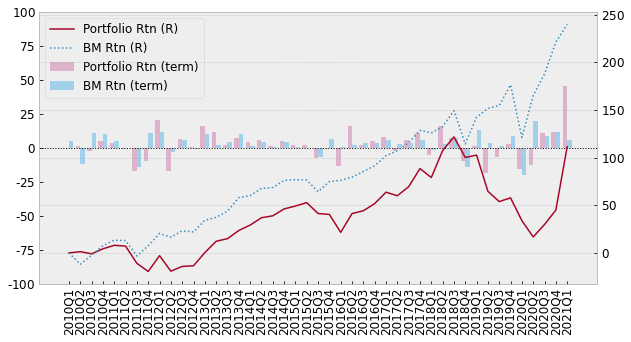

In [16]:
fs.draw_return(df)

## 2) 장부가치 대비 저평가 종목, PBR(Price to Book Ratio: 주가순자산비율)

[PER vs PBR]
1.  **PER** : 기업이 만들어내는 '이익'에 대해 시장이 매기는 가치
2.  **PBR** : 기업이 가진 '순자산'에 대해 시장이 매기는 가치

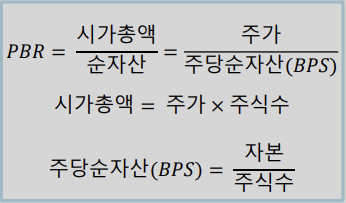

* 투자의 안정성을 표시하는 대표적 지표
* 주식을 사는데 들이는 비용(주가)대비 *회사가 망해도 남는 돈(주당자본근=주당 순자산)이 얼마나 많은지* 계산한 지표
* PBR이 1이라면 망해도 본전, 1보다 작다면 망해도 남는 장사

In [17]:
df = fs.fn_single(otp=otp, symbol='JBLU', window='T') # 제트블루(JBLU)의 재무 데이터를 받아오기

### 1) PBR을 계산하고 PBR 추이를 차트로 그리기

* PBR = 주가 / BPS(주당순자산)
* BPS부터 우선 계산해주고 PBR을 계산해야 함 -> BPS = 주당순자산 = 자본 / 주식수

(Shareholders Equity : 총자본, Shares: 주식수)

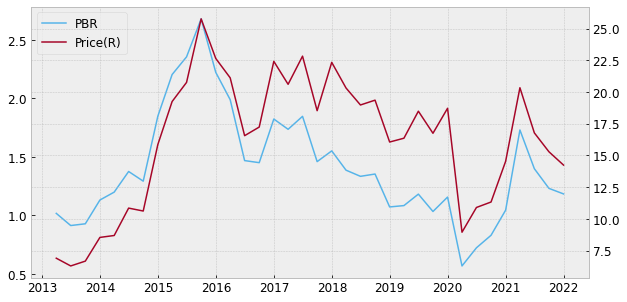

In [18]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

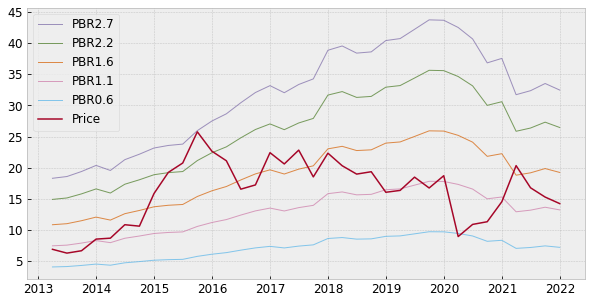

In [19]:
# PBR 밴드차트 그리기
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS') # PBR 밴드 그려보기

* 2015년 하반기에 주가가 최고치인 $25 수준으로 올라갔고, PBR은 2.7을 찍음

* 2020년 상반기 팬데믹 시기에는 주가는 $9 수준까지 내려갔고, PBR도 0.6으로 내려감
* 차트 마지막 부분인 2020년 말에는 주가가 많이 회복하여 PBR 1.1 근처까지 도달한 모습이 보임

## [투자전략]
: PBR이 낮은 종목을 사서 기다리는 것 -> PBR이 0.1 이상인 종목을 대상으로만 투자하며 마이너스 값이 나오면 값을 0으로 대체

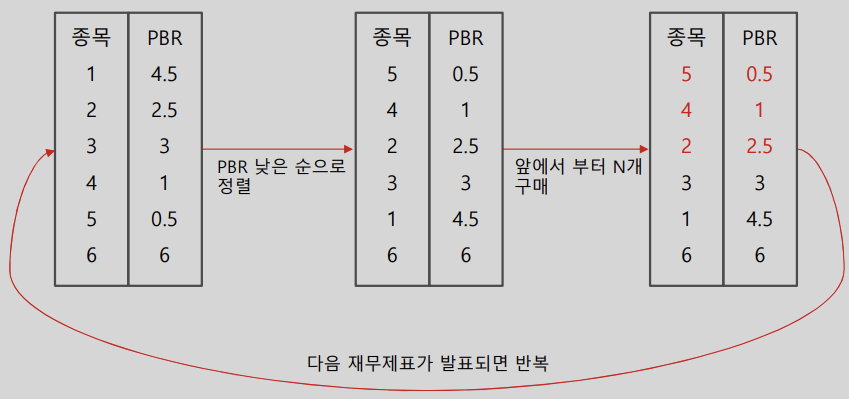

### 2) 백테스트
: 분기별로 PBR 값이 낮은 순서대로 **상위 30개** 종목에 투자하는 전략을 테스트

* 투자기간 : 2010년 1분기에 최초 투자 ~ 2021년 1분기까지 완료하는 것을 가정
* 데이터 : 2019년 4분기 ~ 2020년 4분기까지 데이터 (2020년 1분기에 최초 투자를 개시해서 2021년 1분기까지 완료하는 것을 가졍해 1년으로 함)

In [20]:
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=otp, term=t)
s = {}
signal = {}
for t in terms:
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
  s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True) # 최소 PBR값 : 0.1, 최대 PBR값 : 2
  signal[t] = list(s[t].index) # 선정된 종목을 signal에 저장
df = fs.backtest(signal=signal, data=data, m=2, cost=.001) # 리밸런싱 시점(해당 재무제표 시점 2개월 후)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 210.45%
Accumulated return: 210.45%
Investment period: 1.0yrs
Sharpe ratio: 3.95
MDD: 0.00%


-> 수익률(CAGR)이 엄청나고 MDD가 상당히 적음 -> 거의 손해를 보지 않는 전략

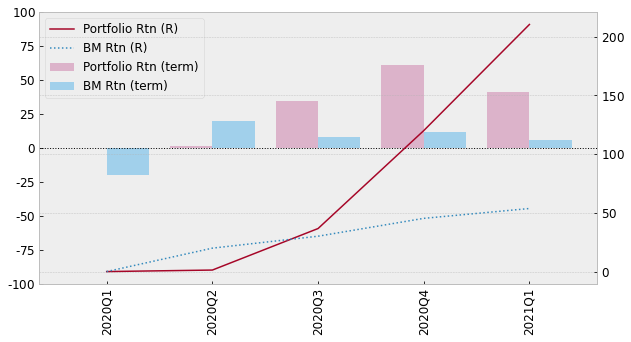

In [21]:
fs.draw_return(df) # 기간 별로 수익률을 그래프로 그려보기

* 2분기에 저조했으나 3분기부터 본격적으로 회복함
* 하늘색 막대는 벤치마크 지수인데 2분기에 확 올라감 -> PBR 전략을 이용한 투자를 했다면 2020년 2분기에 다른 종목은 올라가는데 내 종목만 빠지는 상대적으로 힘든 시간을 버텨내야 했을 것

### 3) 리밸런싱 일자 변경
: 기존에는 2개월 후로 지정했지만 3개월 후로 지정해 테스트

In [22]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 559.97%
Accumulated return: 559.97%
Investment period: 1.0yrs
Sharpe ratio: 7.46
MDD: 0.00%


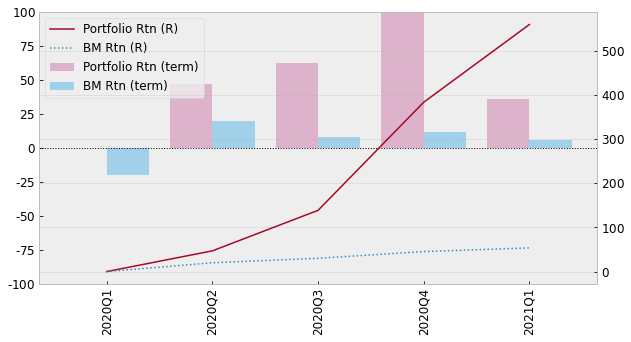

In [23]:
fs.draw_return(df)

-> 2개월 보다 수익률도 높고 저조했던 2분기에서도 높은 수익률을 기록함 -> m=2보다 m=3이 우월하다고 결론 내릴 수 없음

## 3) 매출 대비 저평가 종목, PSR(Price to Sales Ratio: 주가매출비율)

[PER vs PBR]
1.  **PER** : '이익'에 대해 시장이 매기는 가치
2.  **PSR** : '매출액'에 대해 시장이 매기는 가치

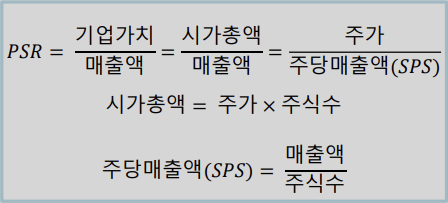

In [24]:
df = fs.fn_single(otp=otp, symbol='WMT', window='T') # 월마트(WTM)의 재무 데이터를 받아오기

* PSR = 주가 / SPS(주당매출액)
* SPS = 주당매출액 = 매출액(Revenue) / 주식수(Shares)

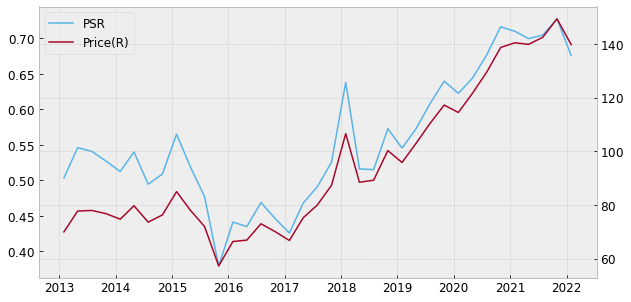

In [25]:
df['SPS'] = df['Revenue'] / df['Shares'] # SPS 계산
df['PSR'] = df['Price'] / df['SPS'] # PSR 계산
fs.draw_chart(df, left='PSR', right='Price') # PSR과 주가 비교

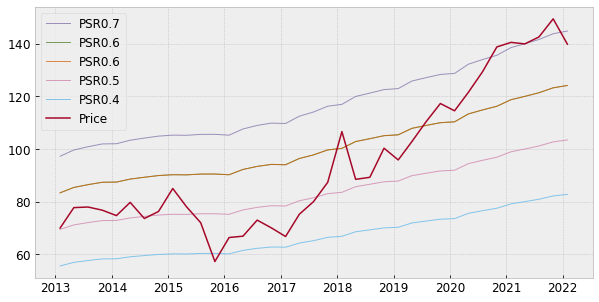

In [26]:
fs.draw_price_multiple_band(df, multiple='PSR', acct='SPS') # PSR 밴드 그려보기

-> 2016년부터 주가와 함께 PSR이 상승하고 있는 모습을 볼 수 있음

### [백테스트]
: 분기별로 PSR 값이 낮은 순서대로 **상위 30개** 종목에 투자하는 전략을 테스트

* 투자기간 : 2010년 1분기에 최초 투자 ~ 2021년 1분기까지 완료하는 것을 가정
* 데이터 : 2019년 4분기 ~ 2020년 4분기까지 데이터 (2020년 1분기에 최초 투자를 개시해서 2021년 1분기까지 완료하는 것을 가졍해 1년으로 함)
* 앞에서 했던 것과 다르게 *분기 말 기준 3개월 후의 주가를 이용*해 구하고 *리밸런싱도 3개월*로 함


In [27]:
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1') # 2020년 1분기 ~ 2021년 1분기
data = {}

for t in terms:
  data[t] = fs.fn_consolidated(otp=otp, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares'] # SPS 계산
  data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS'] # PSR 계산 (3개월 후의 주가를 이용하여 계산)
  s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True) # PSR 기준 상위 30개 종목 선별
  signal[t] = list(s[t].index) # 선정된 종목을 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 벡테스팅 (3개월 후에 리밸런싱하도록 설정) -> 수익률이 상당함

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 344.54%
Accumulated return: 344.54%
Investment period: 1.0yrs
Sharpe ratio: 6.10
MDD: 0.00%


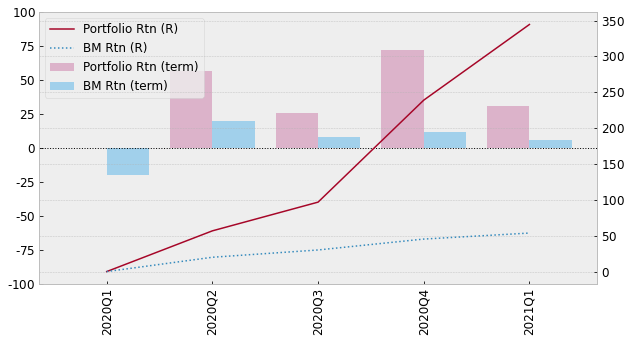

In [28]:
fs.draw_return(df) # 기간별 수익률 그래프

-> 앞선 기간에서 상승세가 워낙 강해서 2020년만 해서는 백테스팅이 너무 좋게만 나올 것 같음 -> 다른 해에는 어땠는지 확인해볼 필요가 있음

### [기간을 바꿔 10년간 백테스팅 해보기] -> start만 10년 전인 2011년 1분기로 지정

In [30]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}

for t in terms:
  data[t] = fs.fn_consolidated(otp=otp, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares'] # SPS 계산
  data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS'] # PSR 계산 (3개월 후의 주가를 이용하여 계산)
  s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True) # PSR 기준 상위 30개 종목 선별
  signal[t] = list(s[t].index) # 선정된 종목을 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 벡테스팅 (3개월 후에 리밸런싱하도록 설정) -> 수익률이 상당함

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 32.77%
Accumulated return: 1605.69%
Investment period: 10.0yrs
Sharpe ratio: 4.29
MDD: -35.17%


* CAGR은 꽤 높지만 MDD가 큼 -> 가장 타이밍이 나빴던 투자자는 자산이 무너져 가는 걸 지켜보고 있어야 함 (좋은 수익률을 감당하려면 상당기간 고통 감수)
* 수익률이 높아도 MDD가 큰 전략은 꾸준히 실행하기가 쉽지 않다는 것을 알 수 있음

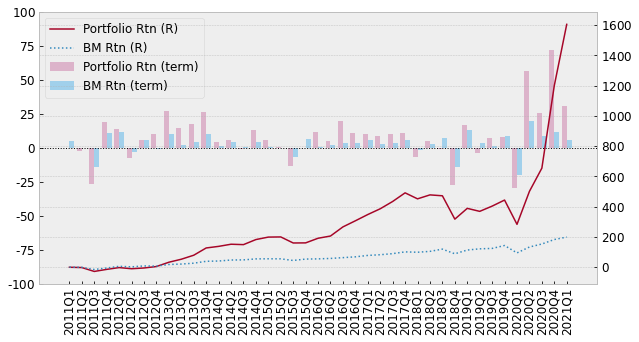

In [31]:
fs.draw_return(df) # 기간별 수익률 그래프

## 4) 현금흐름 대비 저평가 종목, PCR(Price to Cash Flow Ratio: 주가현금흐름비율)

[PBR vs PCR]
1.  **PBR** : '자본'에 대한 평가
2.  **PCR** : 현금을 얼마나 잘 만들었는지에 대한 평가

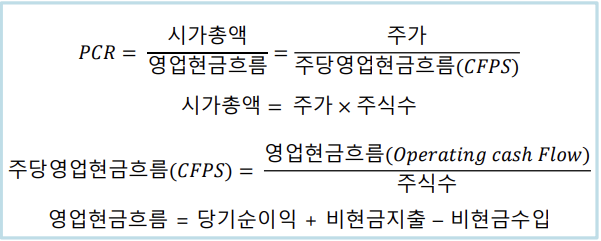


In [32]:
df = fs.fn_single(otp=otp, symbol='MCD', window='T') # 맥도날드(MCD)의 재무제표를 받아오기

* PCR = 주가 / CFPS(주당현금흐름)
* OCF = 당기순이익(Net Income) + 감가상각비(Depreciation & Amortization)
* CFPS = OCF / 주식수(Shares)

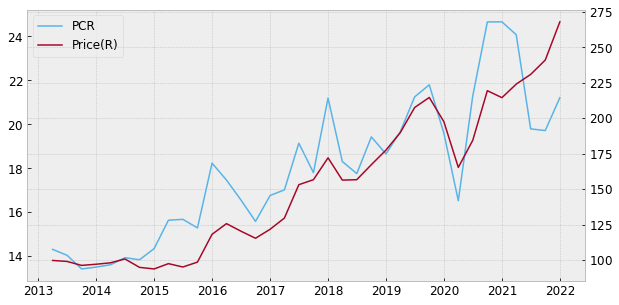

In [33]:
df['OCF'] = df['Net Income'] + df['Depreciation'] # OCF(영업 현금흐름) 계산
df['CFPS'] = df['OCF'] / df['Shares'] # CFPS(주당 현금흐름) 계산
df['PCR'] = df['Price'] / df['CFPS'] # PCR 계산
fs.draw_chart(df, left='PCR', right='Price') # PCR과 주가 비교 그래프

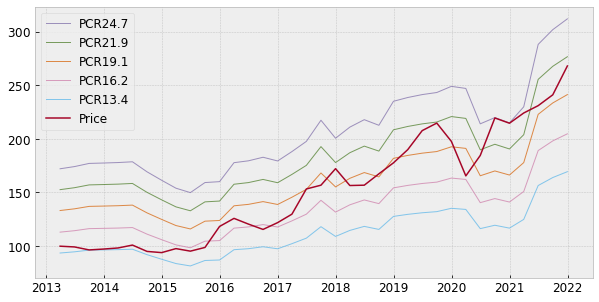

In [35]:
fs.draw_price_multiple_band(df, multiple='PCR', acct='CFPS') # PCR 밴드 그려보기

-> 2013년에는 PCR이 13배 수준이었던 것이 2021년 24배까지 올라감 -> 시중에 넘치는 유동성(현금)이 미래 산업이 아닌 식음료기업의 주가마저도 새로운 멀티플 구간으로 밀어올린 모습

### [백테스트]
: 분기별로 PCR 값이 낮은 순서대로 **상위 30개** 종목에 투자하는 전략을 테스트

* 투자기간 : 2010년 1분기에 최초 투자 ~ 2021년 1분기까지 완료하는 것을 가정
* 데이터 : 2019년 4분기 ~ 2020년 4분기까지 데이터 (2020년 1분기에 최초 투자를 개시해서 2021년 1분기까지 완료하는 것을 가졍해 1년으로 함)
* *분기 말 기준 3개월 후의 주가를 이용*해 구하고 *리밸런싱도 3개월*로 함

In [37]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}

for t in terms:
  data[t] = fs.fn_consolidated(otp=otp, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['CFPS'] = (data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares'] # CFPS 계산
  data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS'] # PCR 계산 (3개월 후의 주가를 이용하여 계산)
  s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=30, asc=True) # PSR 기준 상위 30개 종목 선별
  signal[t] = list(s[t].index) # 선정된 종목을 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 벡테스팅 (3개월 후에 리밸런싱하도록 설정) -> MDD가 큼

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 15.81%
Accumulated return: 334.34%
Investment period: 10.0yrs
Sharpe ratio: 0.77
MDD: -53.77%


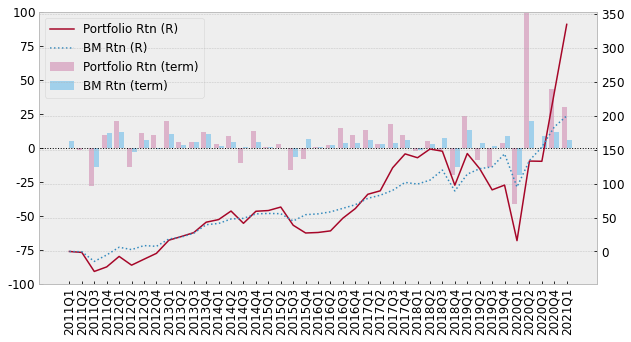

In [38]:
fs.draw_return(df) # 기간별 수익률 그래프

* 2020년 2분기 가장 많은 돈을 벌었음
* 그 이전 분기인 3월 말에 주가가 많이 빠져있어서 저평가 종목이 많아 졌는데 그때 구매한 종목 가격이 6월에 많이 뛴 결과
* 2020년 현금 대방출이 아니었으면 전략은 성공적이지 못했을 것


### [10종목 백테스트]
: 분기별로 30종목이 아닌 10종목을 선정했을 때 결과를 확인 (n=10으로 바꿔주기)

In [40]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}

for t in terms:
  data[t] = fs.fn_consolidated(otp=otp, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['CFPS'] = (data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares'] # CFPS 계산
  data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS'] # PCR 계산 (3개월 후의 주가를 이용하여 계산)
  s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True) # PSR 기준 상위 10개 종목 선별
  signal[t] = list(s[t].index) # 선정된 종목을 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 벡테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 25.82%
Accumulated return: 895.78%
Investment period: 10.0yrs
Sharpe ratio: 1.72
MDD: -44.38%


* 종목 수를 줄이니 수익률과 샤프비율이 더 개선됨
* PCR이 낮은 종목일수록 상승폭이 높다는 의미

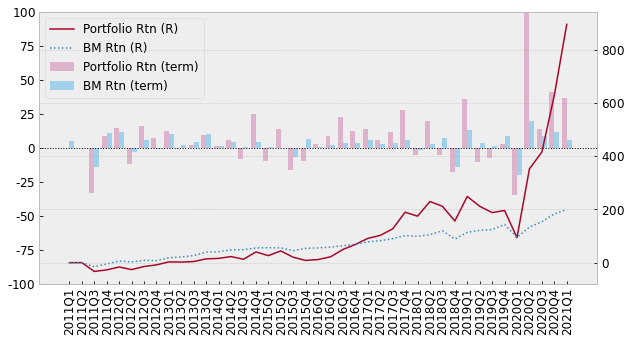

In [41]:
fs.draw_return(df) # 기간별 수익률 그래프

* 종목수를 줄이니 수익률 상승폭이 더 커진 모습을 볼 수 있음 (오른쪽 수치)
* 이 테스트를 통해 종목수를 줄였을 때 수익률이 개선됐다고 해서 포트폴리오 종목을 마냥 줄이는 것은 위험함